## Import image

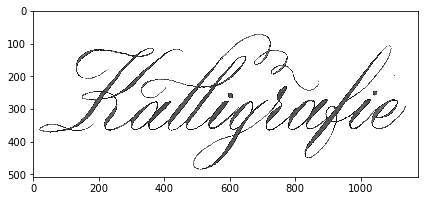

In [1]:
from skimage.io import imread, imshow

image_scan = imread('test-files/kalligrafie.png', as_gray=True)
imshow(image_scan)

## Convert image to binary

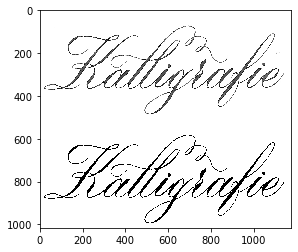

In [2]:
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Set display size of all plt plots
#plt.rcParams['figure.figsize'] = (25, 25)

# Use Otsu's thresholding method to determine the threshold
threshold = threshold_otsu(image_scan)

# Create binary image
image_binary = image_scan > threshold

# Show the grayscale and binary image
plt.imshow(np.vstack((image_scan, image_binary)), cmap='gray', interpolation='nearest')

## Remove islands

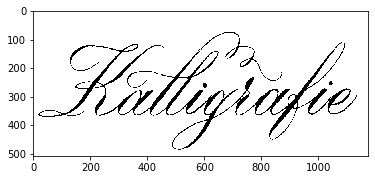

In [3]:
import skimage.morphology as mrp

# Use morphology methods to close small holes and open (remove) small pixel islands
image_cleaned = mrp.remove_small_holes(image_binary)
image_cleaned = mrp.remove_small_objects(image_cleaned)

plt.imshow(image_cleaned, cmap='gray', interpolation='nearest')

## Trace contours

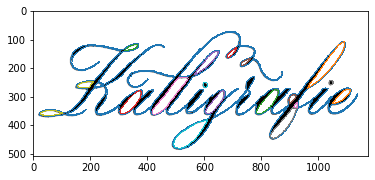

In [4]:
from skimage import measure
from skimage import filters

# Apply gaussian filter to slightly smoothen the edges
image_smoothened = filters.gaussian(image_cleaned, 0.5)

# Trace contours using skimage
contours = measure.find_contours(image_smoothened)

# Round contours to 1 decimal
#for i, contour in enumerate(contours):
#   contours[i] = np.round(contour, 1)

# Display the image and plot all contours
fig, ax = plt.subplots()
ax.imshow(image_smoothened, cmap='gray')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], marker=',', linestyle='none')

## Get curvatures

In [5]:
from boundary_curvature import curvature

contours_with_curvatures = curvature.curvature(image_smoothened, 8, .1)

In [6]:
contours_with_curvatures[0][1]

array([0.02733443, 0.00095171, 0.01213724, ..., 0.05401976, 0.04955239,
       0.02733443])

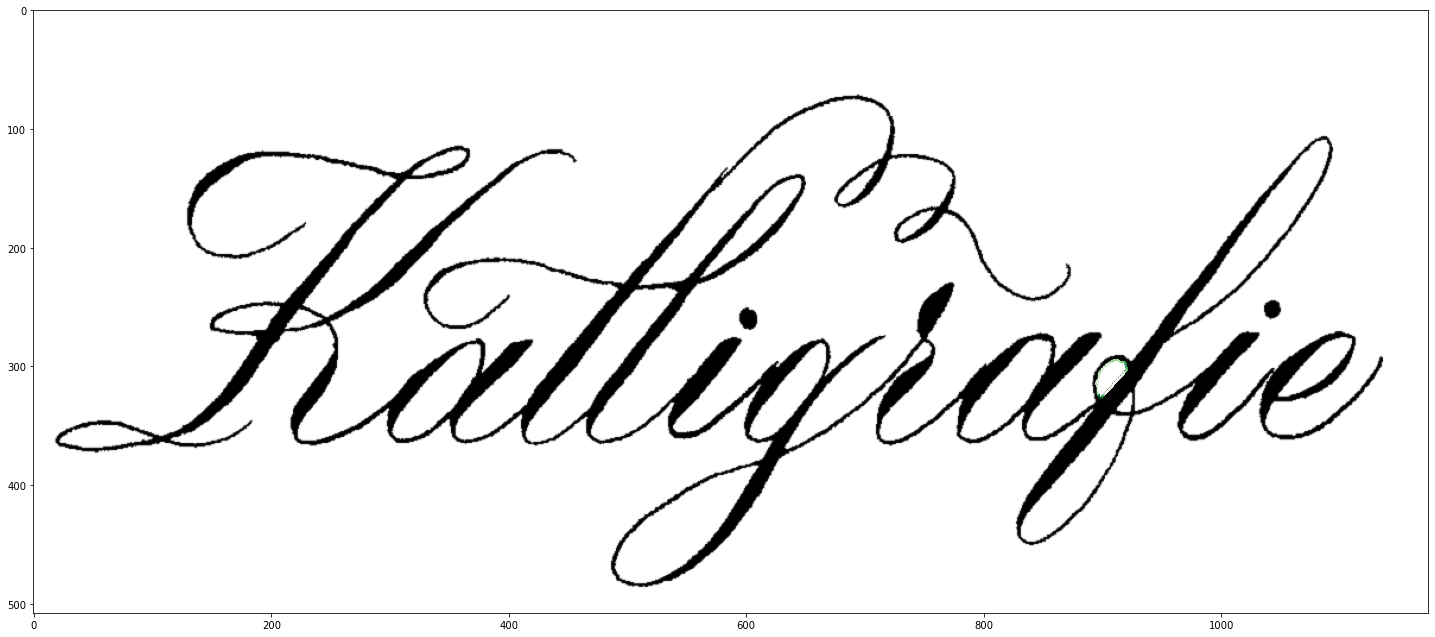

In [77]:
# Display the image and plot all contours
fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(image_smoothened, cmap='gray')
#for contour in contours_with_curvatures:
#ax.scatter(contour[0][:, 0], contour[0][:, 1], c=contour[1], marker=',', s=1, cmap='Greens')

contour = contours_with_curvatures[15]
ax.scatter(contour[0][:, 0], contour[0][:, 1], c=contour[1], marker=',', s=1, cmap='Greens')

In [8]:
# https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html

def smooth(x, window_len=11, window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")

    if window_len < 3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s = np.r_[x[window_len - 1:0:-1], x, x[-2:-window_len - 1:-1]]
    #print(len(s))
    if window == 'flat':  #moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')

    y = np.convolve(w / w.sum(), s, mode='valid')
    return y

[[923.         338.43324124]
 [922.20176882 338.48641057]
 [921.40221593 338.49993974]
 [920.60221593 338.5       ]
 [919.80221593 338.5       ]
 [919.00221593 338.50000001]
 [918.20221593 338.50000001]
 [917.40221594 338.49991045]
 [916.60309487 338.47342164]
 [915.85219998 338.30519088]
 [915.247607   337.78129459]
 [914.52868359 337.53527397]
 [913.73063542 337.47953156]
 [912.95243866 337.37649946]
 [912.55576432 336.73321238]
 [912.50460657 335.93544819]
 [912.55764247 335.13720813]
 [913.00539969 334.5035407 ]
 [913.56660452 333.93341452]
 [914.13227753 333.36771667]
 [914.69618262 332.80026664]
 [915.24251351 332.21625345]
 [915.50550401 331.49356028]
 [915.78893035 330.78682893]
 [916.49583833 330.50063051]
 [917.20511711 330.21912386]
 [917.49330952 329.51477404]
 [917.75191542 328.79005777]
 [918.29791802 328.20573885]
 [918.86176997 327.63823615]
 [919.42745235 327.07254767]
 [919.99313774 326.50686222]
 [920.55828554 325.94064384]
 [921.11228759 325.36377489]
 [921.47495756

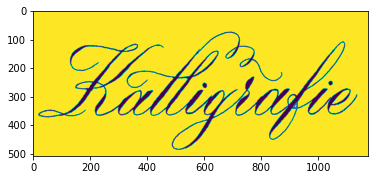

In [9]:
print(contours_with_curvatures[16][0])
plt.imshow(image_cleaned)
plt.plot(contours_with_curvatures[16][0][:, 0], contours_with_curvatures[16][0][:, 1])

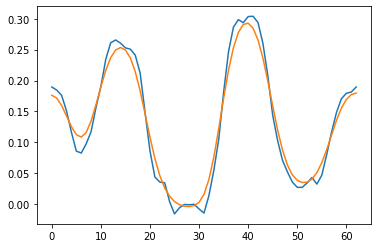

In [39]:
plt.plot(contours_with_curvatures[16][1])
plt.plot(smooth(contours_with_curvatures[16][1])[5:-5])

In [11]:
from scipy.signal import argrelmax

# I need the avg curvature close to high curvature values
peaks = []
dips = []

for contour in contours_with_curvatures:
    smoothed_curvature = smooth(contour[1])[5:-5]
    peaks.append(argrelmax(smoothed_curvature, mode='wrap'))
    dips.append(argrelmax(-smoothed_curvature, mode='wrap'))

peaks = np.asarray(peaks)
dips = np.asarray(dips)

print(peaks)
print(dips)

[[array([    1,    12,    27,    54,    65,    84,   105,   116,   129,
           132,   146,   165,   188,   199,   217,   229,   239,   252,
           269,   291,   303,   315,   326,   350,   366,   388,   409,
           462,   475,   485,   494,   508,   520,   529,   560,   572,
           590,   606,   635,   652,   680,   690,   711,   727,   738,
           760,   779,   813,   829,   848,   861,   873,   889,   901,
           925,   945,   963,   973,   989,  1002,  1018,  1033,  1045,
          1063,  1082,  1097,  1112,  1126,  1137,  1147,  1169,  1180,
          1193,  1206,  1222,  1232,  1257,  1272,  1279,  1298,  1308,
          1323,  1341,  1357,  1382,  1403,  1418,  1433,  1441,  1457,
          1481,  1515,  1528,  1542,  1572,  1586,  1598,  1607,  1628,
          1639,  1653,  1662,  1673,  1683,  1696,  1711,  1723,  1737,
          1749,  1758,  1780,  1806,  1832,  1844,  1858,  1878,  1892,
          1912,  1925,  1934,  1948,  1971,  1992,  2021,  2039,

C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [12]:
# Combine to one array, filter out those where the difference is very small
from enum import Enum


class Extrema(Enum):
    PEAK = 1
    DIP = 0


def get_peak_or_dip_filter_condition(dip_or_peak: Extrema, curvature_array: np.ndarray, peak_array: np.ndarray,
                                     dip_array: np.ndarray, index: int,
                                     threshold: float = 0.1):
    current_array = peak_array if dip_or_peak else dip_array
    neighbor_array = dip_array if dip_or_peak else peak_array
    before = curvature_array.take(neighbor_array[index - 1], mode='wrap')
    current = curvature_array.take(current_array[index], mode='wrap')
    after = curvature_array.take(neighbor_array.take([index + 1], mode='wrap'), mode='wrap')
    return np.abs(before - current) > threshold and np.abs(after - current) > threshold


peaks_and_dips = []
for i, contour_peaks in enumerate(peaks):
    if i == 16:
        print(16)
    contour_peaks_and_dips = []
    curvature = contours_with_curvatures[i][1]
    for j in np.arange(0, len(contour_peaks[0])):
        peak = contour_peaks[0][j]
        dip = dips[i, 0][j]
        if peak < dip:
            if get_peak_or_dip_filter_condition(Extrema.PEAK, curvature, contour_peaks[0], dips[i, 0], j):
                contour_peaks_and_dips.append(np.array([peak, Extrema.PEAK.value]))
            if get_peak_or_dip_filter_condition(Extrema.DIP, curvature, contour_peaks[0], dips[i, 0], j):
                contour_peaks_and_dips.append(np.array([dip, Extrema.DIP.value]))
        else:
            if get_peak_or_dip_filter_condition(Extrema.DIP, curvature, contour_peaks[0], dips[i, 0], j):
                contour_peaks_and_dips.append(np.array([dip, Extrema.DIP.value]))
            if get_peak_or_dip_filter_condition(Extrema.PEAK, curvature, contour_peaks[0], dips[i, 0], j):
                contour_peaks_and_dips.append(np.array([peak, Extrema.PEAK.value]))

    contour_peaks_and_dips = np.asarray(contour_peaks_and_dips)
    if len(contour_peaks_and_dips) > 0:
        peaks_and_dips.append(contour_peaks_and_dips[contour_peaks_and_dips[:, 0] < len(curvature)])
    else:
        peaks_and_dips.append(contour_peaks_and_dips)

peaks_and_dips[16]

16


array([[ 6,  0],
       [14,  1],
       [28,  0],
       [40,  1],
       [51,  0],
       [62,  1]], dtype=int64)

In [13]:
contours_with_curvatures[8][0].take(peaks_and_dips[8][:, 0], axis=0)

array([[152.50001772, 264.88173326],
       [158.68806641, 258.80640051],
       [207.42235346, 249.99847972],
       [200.42410615, 260.07728464],
       [195.71771123, 268.77726706],
       [187.97484422, 269.50000377]])

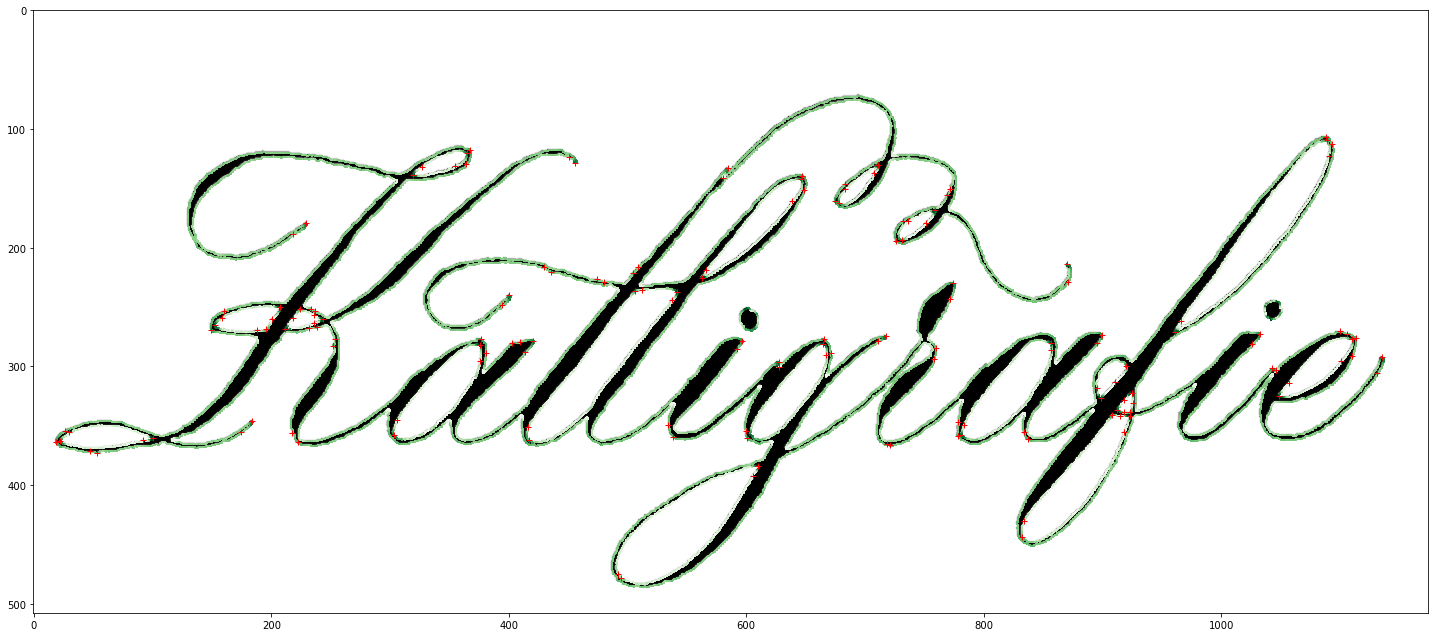

In [14]:
# Display the image and plot all contours and peaks/dips
fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(image_smoothened, cmap='gray')
for i, contour in enumerate(contours_with_curvatures):
    ax.scatter(contour[0][:, 0], contour[0][:, 1], c=contour[1], marker=',', s=1, cmap='Greens')
    if len(peaks_and_dips[i]) > 0:
        ax.plot(contour[0].take(peaks_and_dips[i][:, 0], axis=0)[:, 0],
                contour[0].take(peaks_and_dips[i][:, 0], axis=0)[:, 1], 'r+')

In [15]:
contours_with_curvatures[i][0]

array([[516.00000001, 482.43326372],
       [515.20176858, 482.48642938],
       [514.40221564, 482.50002581],
       [513.60221566, 482.50008658],
       [512.80221566, 482.50001434],
       [512.00221566, 482.50000009],
       [511.20221566, 482.50000005],
       [510.40221566, 482.50001073],
       [509.60221567, 482.50007041],
       [508.80221567, 482.50015342],
       [508.00221567, 482.50016771],
       [507.20221568, 482.50004821],
       [506.40353748, 482.46028685],
       [505.70109511, 482.17431196],
       [505.09653062, 481.65038279],
       [504.32922181, 481.52197107],
       [503.53099738, 481.46870047],
       [502.79759627, 481.25787528],
       [502.19300329, 480.73397899],
       [501.45658613, 480.53055232],
       [500.65759723, 480.50004724],
       [499.85791174, 480.49039149],
       [499.05967847, 480.43725349],
       [498.44061679, 479.94854282],
       [497.78350756, 479.55228847],
       [496.9852831 , 479.4990184 ],
       [496.18705685, 479.44577493],
 

In [16]:
# Sort out points that are too close together

min_distance = 5

peaks_and_dips_with_min_distance = []
for i, contour in enumerate(peaks_and_dips):
    filtered_peaks_and_dips = []
    if len(contour) > 0:
        l = len(contours_with_curvatures[i][0])
        for j, extrema in enumerate(np.int32(contour[:, 0])):
            # Handle first
            if j == 0:
                if len(contour) == 1:
                    filtered_peaks_and_dips.append(contour[0])
                elif (extrema + contour[:, 0][-1]) % l > min_distance and contour[:, 0][1] - extrema > min_distance:
                    filtered_peaks_and_dips.append(contour[j])
            # Handle last
            elif j == len(contour) - 1:
                if extrema - contour[:, 0][j - 1] > min_distance and (extrema + contour[:, 0][0]) % l > min_distance:
                    filtered_peaks_and_dips.append(contour[j])
            # Standard case
            else:
                if extrema - contour[:, 0][j - 1] > min_distance and contour[:, 0][j + 1] - extrema > min_distance:
                    filtered_peaks_and_dips.append(contour[j])

    peaks_and_dips_with_min_distance.append(np.asarray(filtered_peaks_and_dips))

#peaks_and_dips_with_min_distance

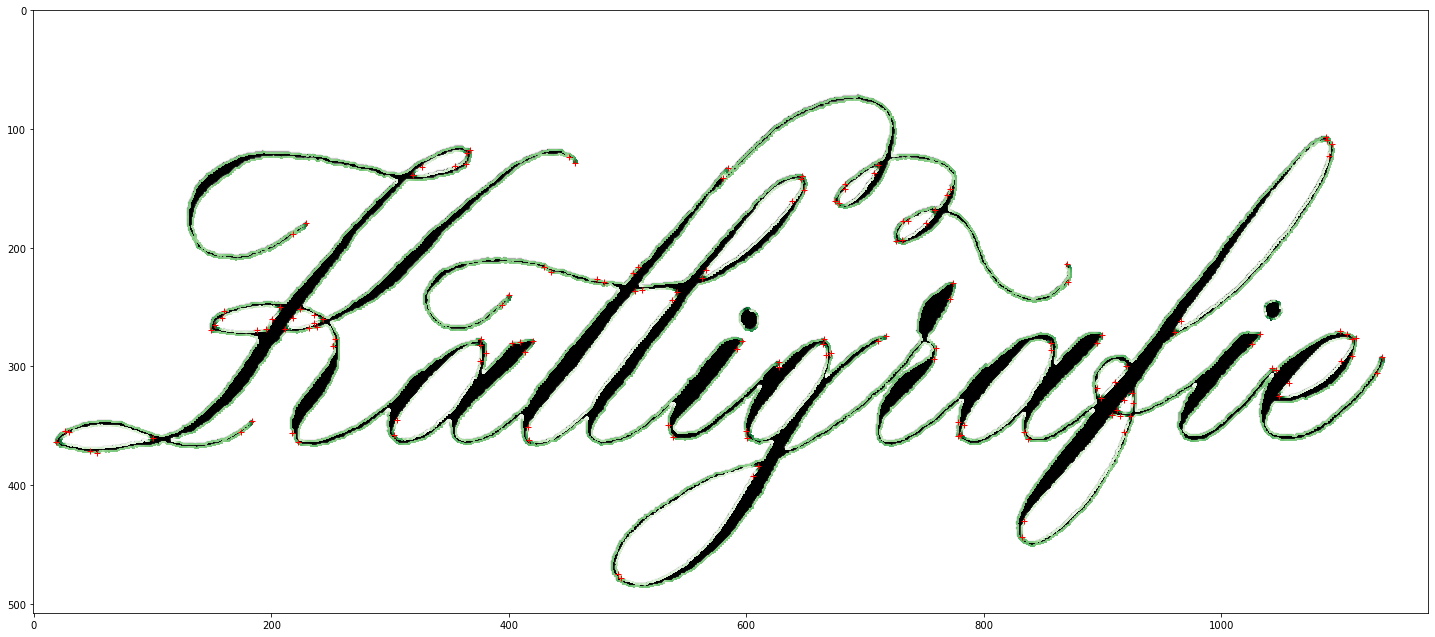

In [17]:
# Display the image and plot all contours and peaks/dips
fig, ax = plt.subplots(figsize=(25, 25))
ax.imshow(image_smoothened, cmap='gray')
for i, contour in enumerate(contours_with_curvatures):
    ax.scatter(contour[0][:, 0], contour[0][:, 1], c=contour[1], marker=',', s=1, cmap='Greens')
    if len(peaks_and_dips_with_min_distance[i]) > 0:
        ax.plot(contour[0].take(peaks_and_dips_with_min_distance[i][:, 0], axis=0)[:, 0],
                contour[0].take(peaks_and_dips_with_min_distance[i][:, 0], axis=0)[:, 1], 'r+')

In [247]:
# Fit function to points left and right of extrema and check for their crossing angle

def get_neighbour_points(points_array: np.ndarray, index: int, before: bool, n: int, min_distance: int = 0):
    lower_index = index - min_distance - n if before else index + 1 + min_distance
    upper_index = index - min_distance if before else index + 1 + min_distance + n
    if (lower_index >= 0 and upper_index < len(points_array)) or (lower_index < 0 and upper_index < 0):
        return points_array[lower_index:upper_index]
    else:
        return np.concatenate([points_array[lower_index:], points_array[0:upper_index % len(points_array)]])


def get_left_neighbours(points_array: np.ndarray, index: int, n: int, min_distance: int = 0):
    return get_neighbour_points(points_array, index, True, n, min_distance)


def get_right_neighbours(points_array: np.ndarray, index: int, n: int, min_distance: int = 0):
    return get_neighbour_points(points_array, index, False, n, min_distance)


# https://appdividend.com/2021/01/18/numpy-linalg-lstsq-function-in-python/
def get_regression_line(points_array: np.ndarray):
    x = points_array[:, 0]
    A = np.array([x, np.ones(len(x))])
    y = points_array[:, 1]
    line = np.linalg.lstsq(A.T, y, rcond=None)[0]
    # Get two points for plotting and angle detection
    p0 = [points_array[0][0], line[0] * points_array[0][0] + line[1]]
    pn = [points_array[-1][0], line[0] * points_array[-1][0] + line[1]]
    return np.array([p0, pn, line])


from sympy import symbols, Eq, solve


def get_intersection_point(line1, line2):
    # Solve line1 = line2
    x = symbols('x')
    eq = Eq(line1[2][0]*x+line1[2][1], line2[2][0]*x+line2[2][1])
    solution = solve(eq)[0]
    return solution, line1[2][0] * solution + line1[2][1]


# def get_angle(line1, line2):
#     # Angle can be computed with their slopes
#     return np.abs((np.arctan(line1[2][0]) - np.arctan(line2[2][0])) * 180 / np.pi)

def get_angle_between(line1, line2):
    direction1 = line1[1] - line1[0]
    direction2 = line2[1] - line2[0]
    return np.arccos(np.dot(direction1, direction2) / (np.hypot(*direction1) * np.hypot(*direction2))) * 180 / np.pi

C:\Users\marti\AppData\Local\Temp/ipykernel_22780/3299029311.py:50: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(np.dot(direction1, direction2) / (np.hypot(*direction1) * np.hypot(*direction2))) * 180 / np.pi


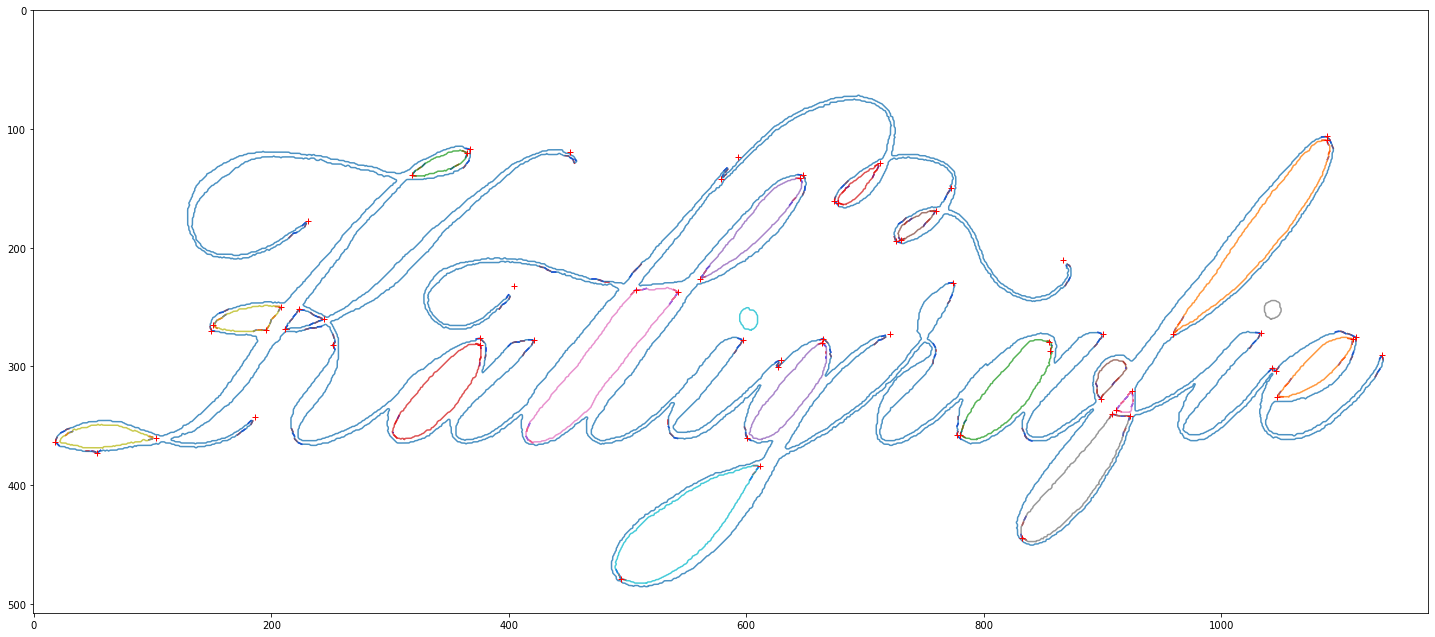

In [264]:
# Number of contour points to fit line to/calculate average over
line_neighbours = 5
avg_neighbours = 15

# Number of contour points next to extrema to not take into account
line_min_distance = 0
avg_min_distance = -2

# Minimum angle (in degrees) between lines to take them as corner
min_angle = 35

# Minimum curvature difference and angle to keep extrema
min_curvature_difference = 0.15
min_angle_similar_curvature = 35

# Prepare plot
plt.subplots(figsize=(25, 25))

corner_points = []
for i, contour_extrema in enumerate(peaks_and_dips_with_min_distance):
    contour_points = contours_with_curvatures[i]
    if len(contour_extrema) > 0:
        for extrema in contour_extrema[:, 0]:
            # Get lines
            left = get_left_neighbours(contour_points[0], extrema, line_neighbours, line_min_distance)
            right = get_right_neighbours(contour_points[0], extrema, line_neighbours, line_min_distance)
            left_line = get_regression_line(left)
            right_line = get_regression_line(right)
            plt.plot(right_line[:-1, 0], right_line[:-1, 1], 'b-')
            plt.plot(left_line[:-1, 0], left_line[:-1, 1], 'r-')

            # Get angle between lines
            angle = get_angle_between(left_line, right_line)

            # Get average curvatures
            left_avg = np.average(get_left_neighbours(contour_points[1], extrema, avg_neighbours, avg_min_distance))
            right_avg = np.average(get_right_neighbours(contour_points[1], extrema, avg_neighbours, avg_min_distance))

            # Compare curvatures
            if np.abs(left_avg - right_avg) < min_curvature_difference and angle < min_angle_similar_curvature:
                continue

            if angle > min_angle:
                corner_points.append(get_intersection_point(left_line, right_line))
            # else smooth curve?

corner_points = np.asarray(corner_points)
#print(corner_points)

# Show corners and contour
plt.imshow(image_cleaned, alpha=0)  # invisible, only for shape of plot
for contour in contours_with_curvatures:
    plt.plot(contour[0][:, 0], contour[0][:, 1], alpha=0.8)
plt.plot(corner_points[:, 0], corner_points[:, 1], 'r+')
plt.savefig('test-files/test.png', dpi=1200)

In [ ]:
# Drag contour to new corners.
# Only do so if corner not further away than 5px

## test

0.4 -0.1
[-0.24016480853415031, 0.5651819790871508]
0.4 -0.1
[-0.24016480853415031, 0.5651819790871508]
0.4 -0.1
[-0.24016480853415031, 0.5651819790871508]
0.4 -0.09998501781482219
[-0.24013160924819701, 0.5651749261106822]
0.4 -0.093341345170694
[-0.22529724476019095, 0.5621303793916873]
0.45 -0.0566736370144838
[-0.12462943818965268, 0.5468806794785434]
0.45 -0.056673632789522796
[-0.12462942909137266, 0.5468806785116872]
0.4 -0.093341345170694
[-0.22529724476019095, 0.5621303793916873]
0.4 -0.1
[-0.24016480853415031, 0.5651819790871508]
0.4 -0.10666088869849091
[-0.2548084601377232, 0.5683984027542984]
0.34909623116618604 -0.1433263629855162
[-0.3707346672850081, 0.6017797642158462]
0.35 -0.15
[-0.3838104805921633, 0.6065001506440303]
0.35090376883381397 -0.1566736370144838
[-0.396493941459958, 0.6112808243580561]
0.3 -0.1933241291163313
[-0.5155788822038481, 0.6670287509426941]
0.3 -0.19330914693115347
[-0.5155534657553895, 0.667014510063898]
0.35090376883381397 -0.15
[-0.383018384

C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


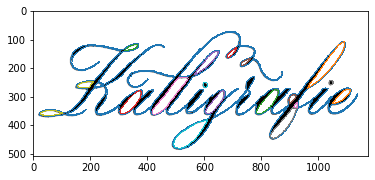

In [13]:
contours_with_gradient = []
for contour in contours:
    direction = []
    for i, _ in enumerate(contour):
        for j in np.arange(-5, 6):
            dx = 0
            dy = 0
            if j == 0:
                continue
            dx += contour[(i + j) % len(contour), 1] - contour[i, 1]
            dy += contour[(i + j) % len(contour), 0] - contour[i, 0]

        dx /= 10
        dy /= 10
        print(dx, dy)
        h = np.sqrt((dx ** 2 + dy ** 2))
        print([np.sin(dy / h), np.cos(dx / h)])
        direction.append([np.sin(dy / h), np.cos(dx / h)])
    contours_with_gradient.append([contour, direction])

#print(np.shape(contours_with_gradient))
#print(contours_with_gradient)
contours_with_gradient = np.asarray(contours_with_gradient)

# Display the image and plot all contours
fig, ax = plt.subplots()
ax.imshow(image_smoothened, cmap='gray')
for contour in contours_with_gradient:
    ax.plot(contour[0][:, 1], contour[0][:, 0], marker=',', linestyle='none')

In [14]:
# find changes in gradient

contours_with_direction_changes = []
for contour in contours_with_gradient:
    print(contour)
    direction_change = []
    for i, _ in enumerate(contour[0]):
        sin_last = contour[1][i - 1][0]
        cos_last = contour[1][i - 1][1]
        sin_now = contour[1][i][0]
        cos_now = contour[1][i][1]
        #if np.abs(sin_last - sin_now) > 0.1:
        direction_change.append(sin_last - sin_now)  #, cos_last - cos_now])
    contours_with_direction_changes.append(direction_change)

contours_with_direction_changes = np.asarray([contours, contours_with_direction_changes]).transpose()
contours_with_direction_changes

[array([[485.        , 517.5       ],
        [484.56673633, 518.        ],
        [484.50014982, 519.        ],
        ...,
        [485.49970029, 516.        ],
        [485.43326363, 517.        ],
        [485.        , 517.5       ]])
 list([[-0.24016480853415031, 0.5651819790871508], [-0.24016480853415031, 0.5651819790871508], [-0.24016480853415031, 0.5651819790871508], [-0.24013160924819701, 0.5651749261106822], [-0.22529724476019095, 0.5621303793916873], [-0.12462943818965268, 0.5468806794785434], [-0.12462942909137266, 0.5468806785116872], [-0.22529724476019095, 0.5621303793916873], [-0.24016480853415031, 0.5651819790871508], [-0.2548084601377232, 0.5683984027542984], [-0.3707346672850081, 0.6017797642158462], [-0.3838104805921633, 0.6065001506440303], [-0.396493941459958, 0.6112808243580561], [-0.5155788822038481, 0.6670287509426941], [-0.5155534657553895, 0.667014510063898], [-0.38301838480484784, 0.6062082454472875], [-0.24016480853415031, 0.5651819790871508], [-0.1104253

C:\Users\marti\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[array([[485.        , 517.5       ],
               [484.56673633, 518.        ],
               [484.50014982, 519.        ],
               ...,
               [485.49970029, 516.        ],
               [485.43326363, 517.        ],
               [485.        , 517.5       ]]),
        list([0.0810018655778739, 0.0, 0.0, -3.319928595330035e-05, -0.014834364488006069, -0.10066780657053827, -9.09828001827151e-09, 0.10066781566881829, 0.014867563773959369, 0.014643651603572866, 0.11592620714728491, 0.013075813307155182, 0.012683460867794705, 0.11908494074389009, -2.5416448458548402e-05, -0.13253508095054167, -0.14285357627069753, -0.12973942376125816, -0.0970452758720925, 0.0, 0.0970452758720925, 0.12973942376125816, 0.14285357627069753, 0.13253508095054167, 2.5416448458548402e-05, -0.11908494074389009, -0.012681467854497364, -0.013046579198461583, -0.10151940205426774, 0.11535694986458728, 0.13098295309182784, 0.011099607901218222, 0.010659582176995364, 0.10396285920936432, 

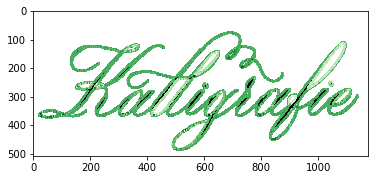

In [15]:

# Display the image and plot all contours
fig, ax = plt.subplots()
ax.imshow(image_smoothened, cmap='gray')
for contour in contours_with_direction_changes:
    ax.scatter(contour[0][:, 1], contour[0][:, 0], marker=',', s=1, c=contour[1], cmap='Greens')

## Detect corners


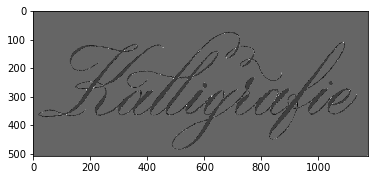

In [16]:
from skimage.feature import corner_harris

# Detect corners using the harris corner detector
corners_harris = corner_harris(image_cleaned)

# Show the harris corner values on the image
fig, ax = plt.subplots()
ax.imshow(image_cleaned, cmap='gray', interpolation='nearest')
ax.imshow(corners_harris, cmap='gray', interpolation='nearest', alpha=0.85)

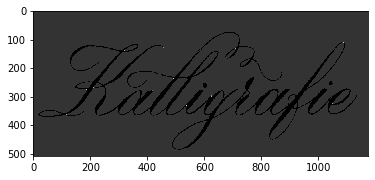

In [17]:
# Filter the brightest spots (highest harris corner value)
corner_threshold = 15
corners_harris[corners_harris < corner_threshold] = 0

# Show the remaining pixels on the image
fig, ax = plt.subplots()
ax.imshow(image_cleaned, cmap='gray', interpolation='nearest')
ax.imshow(corners_harris, cmap='gray', interpolation='nearest', alpha=0.8)

In [18]:
from skimage.feature import peak_local_max

# Get the brightest pixel of each harris corner pixel group
corners_points = peak_local_max(corners_harris)

# Convert contours to 2D array of pixel pairs
contours_combined = np.asarray([pixel for contour in contours for pixel in contour])

## Move corners onto contour

fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 1
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
[122 723] could not be moved to contour.
fallback 1 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 1
fallback 0 1
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 1
[363 621] could not be moved to contour.
fallback 0 1
fallback 0 -1
fallback 0 1
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 -1
fallback 0 0
fallback 0 0
fallback -1 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0
fallback 0 0


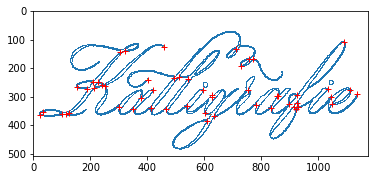

In [19]:
corners_corrected = []

# From a corner peak local max go in x, y until contour reached
# (max. 5 px, otherwise outside corner -> fallback to the closest contour point)
contour_search_distance = 5

for corner in corners_points:
    # Skip if already on contour
    if any(np.equal(contours_combined, corner).all(1)):
        print('skipped')
        continue

    x = corner[1]
    y = corner[0]
    x_direction = 0
    y_direction = 0
    x_corr = 0
    y_corr = 0

    for i in range(1, contour_search_distance * 10 + 1):
        # Search x
        if x_direction == 0:
            if any(np.equal(contours_combined, [y, x + i / 10]).all(1)):
                x_direction = 1
                x_corr = i / 10
            elif any(np.equal(contours_combined, [y, x - i / 10]).all(1)):
                x_direction = -1
                x_corr = -i / 10

        # Search y
        if y_direction == 0:
            if any(np.equal(contours_combined, [y + i / 10, x]).all(1)):
                y_direction = 1
                y_corr = i / 10
            elif any(np.equal(contours_combined, [y - i / 10, x]).all(1)):
                y_direction = -1
                y_corr = -i / 10

    # Move corner
    if x_direction != 0 and y_direction != 0:
        for i in range(1, contour_search_distance * 10 + 1):
            x_corr = x + (i / 10 * x_direction)
            y_corr = y + (i / 10 * y_direction)
            # Move diagonal
            closest_pixel = np.sum(np.abs(np.subtract(contours_combined, [y_corr, x_corr])), axis=1).argmin()
            # As contour pixels are maximum 1 px apart, accepted contour pixel needs to be max 0.5 away
            if np.less_equal(np.abs(np.subtract(contours_combined[closest_pixel], [y_corr, x_corr])), [.5, .5]).all():
                corners_corrected.append(contours_combined[closest_pixel])
                print(f'{corner} moved to {contours_combined[closest_pixel]}')
                break
        else:
            print(f'{corner} could not be moved to contour.')

    # Fallback to initial solution for outside corners
    else:
        print('fallback', x_direction, y_direction)
        distances = np.sqrt((contours_combined[:, 0] - y) ** 2 + (contours_combined[:, 1] - x) ** 2)
        corners_corrected.append(contours_combined[np.argmin(distances)])

# Convert to numpy array
corners_corrected = np.asarray(corners_corrected)

# Show corners and corrected corners on the contour
fig, ax = plt.subplots()
ax.imshow(image_cleaned, alpha=0)  # invisible, only for shape of plot
ax.plot(contours_combined[:, 1], contours_combined[:, 0], linestyle='none', marker=',')
ax.plot(corners_points[:, 1], corners_points[:, 0], linestyle='none', marker=',')
ax.plot(corners_corrected[:, 1], corners_corrected[:, 0], 'r+')

## Split by corners

In [20]:
def split_contour_by_corners(contour, corners):
    segments = []
    first_segmentation_index = -1
    last_segmentation_index = 0
    has_corner = False

    # Search contour for matching corner
    for i, pixel in enumerate(contour):
        for j, corner in enumerate(corners):
            # If a corner is found, create a new segment
            if np.array_equal(corner, pixel):
                segments.append(contour[last_segmentation_index:(i + 1)])
                has_corner = True
                last_segmentation_index = i
                if first_segmentation_index == -1:
                    first_segmentation_index = i

    # Combine first and last segment to one segment and set start point to a corner point
    if first_segmentation_index > 0:
        combined_segment = list(contour[last_segmentation_index:len(contour) - 1]) + list(segments[0])
        segments.append(combined_segment)
        segments.pop(0)
    # Handle special case when start point already is a corner
    elif first_segmentation_index == 0:
        segments.pop(0)
    # If there is no corner found, take contour as segment
    else:
        segments.append(contour)

    return segments, has_corner


contours_in_segments = []
contour_has_corner = []
for contour in contours:
    segments, has_corner = split_contour_by_corners(contour, corners_corrected)
    contours_in_segments.append(segments)
    contour_has_corner.append(has_corner)


## Curve fitting

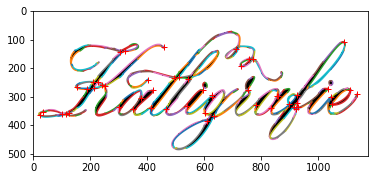

In [21]:
from libraries.fitCurves.fitCurves import *
from libraries import svg

# Parameters for Bézier fitting
maxError = 3
splitError = 30
minIterationsBeforeSplit = 10

# Prepare plot
fig, ax = plt.subplots()
# Use original image as background
ax.imshow(image_cleaned, cmap='gray', interpolation='nearest')

# Prepare SVG
svg_file = svg.create_file('test-files/referenceResult.svg', np.shape(image_cleaned)[1], np.shape(image_cleaned)[0])
path_string = '\n'

for index, contour in enumerate(contours_in_segments):
    has_corner = contour_has_corner[index]
    svg_path = ''

    # Fit a composite cubic Bézier curve to each segment
    for i, segment in enumerate(contour):
        beziers = fitCurve(segment, has_corner, maxError, splitError, minIterationsBeforeSplit)

        # Add each cubic Bézier to the SVG path
        for j, bez in enumerate(beziers):
            bez = np.stack(bez)
            bez = np.round(bez, 2)

            # Build SVG path according to the specification
            if i == 0 and j == 0:
                svg_path = 'M{x0},{y0} C{x1},{y1}, {x2},{y2}, {x3},{y3}'.format(
                    x0=bez[0, 1],
                    y0=bez[0, 0],
                    x1=bez[1, 1],
                    y1=bez[1, 0],
                    x2=bez[2, 1],
                    y2=bez[2, 0],
                    x3=bez[3, 1],
                    y3=bez[3, 0]
                )
            else:
                svg_path += ', {x1},{y1}, {x2},{y2}, {x3},{y3}'.format(
                    x1=bez[1, 1],
                    y1=bez[1, 0],
                    x2=bez[2, 1],
                    y2=bez[2, 0],
                    x3=bez[3, 1],
                    y3=bez[3, 0]
                )

            # Plot the composite Bézier curve
            curve = []
            for t in np.linspace(0, 1, 50):
                curve.append(bezier.q(bez, t))
            curve = np.stack(curve)
            ax.plot(curve[:, 1], curve[:, 0])

    # Append the curve to the overall SVG path string
    path_string += f'{svg_path}Z\n'

# Show the corner points
ax.plot(corners_corrected[:, 1], corners_corrected[:, 0], 'r+')

# Add path to SVG file and save
svg.add_path_element(svg_file, path_string)
svg.save_file(svg_file)

plt.savefig('test-files/test.png', dpi=1200)